# Clustering Crypto

In [34]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [35]:
# Load the crypto_data.csv dataset.
file_path = "Resources/crypto_data.csv"
crypto_df= pd.read_csv(file_path, index_col=0)
crypto_df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [36]:
# Keep all the cryptocurrencies that are being traded.

df= crypto_df[crypto_df["IsTrading"]==True]
df.shape

(1144, 6)

In [37]:
# Keep all the cryptocurrencies that have a working algorithm.
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [38]:
# Remove the "IsTrading" column. 
new_df= df.drop(['IsTrading'], axis=1)
new_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [39]:
# Remove rows that have at least 1 null value.
for column in  new_df.columns:
    print(f"Column {column} has {new_df[column].isnull().sum()}null values")
new_df= new_df.dropna(axis=0, how="any")
new_df.shape

Column CoinName has 0null values
Column Algorithm has 0null values
Column ProofType has 0null values
Column TotalCoinsMined has 459null values
Column TotalCoinSupply has 0null values


(685, 5)

In [40]:
# Keep the rows where coins are mined.
new_df= new_df[new_df["TotalCoinsMined"]>0]
new_df.shape

(532, 5)

In [41]:
# Create a new DataFrame that holds only the cryptocurrencies names.
df_crypto_name = new_df[['CoinName']]
df_crypto_name

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [42]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
new_df= new_df.drop(['CoinName'], axis=1)
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [43]:
# Use get_dummies() to create variables for text features.
X= pd.get_dummies(new_df, columns = ["Algorithm", "ProofType"])
X.shape

(532, 98)

In [44]:
# Standardize the data with StandardScaler().
X = StandardScaler().fit_transform(X)
print(X)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [46]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(X)
crypto_pca

array([[-0.34233551,  0.9858056 , -0.58034852],
       [-0.32565733,  0.98576438, -0.58086826],
       [ 2.31257738,  1.67692852, -0.69783867],
       ...,
       [ 0.3329804 , -2.24892416,  0.4412332 ],
       [-0.15294422, -1.95814577,  0.33538486],
       [-0.29503377,  0.80662472, -0.31872687]])

In [58]:
# Create a DataFrame with the three principal components.
df_trans_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index= new_df.index
)
df_trans_pca.head()

,PC1,PC2,PC3
42,-0.342336,0.985806,-0.580349
404,-0.325657,0.985764,-0.580868
1337,2.312577,1.676929,-0.697839
BTC,-0.141127,-1.268717,0.203725
ETH,-0.139768,-2.002119,0.417233


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\JeD1MndTrX\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


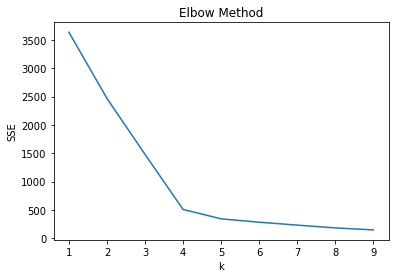

In [59]:
# Create an elbow curve to find the best value for K.
from matplotlib import pyplot as plt
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(df_trans_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [60]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=5)

# Fit the model
model.fit(df_trans_pca)

# Predict clusters
predictions = model.predict(df_trans_pca)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [66]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
df_trans_pca.head()

,PC1,PC2,PC3
42,-0.342336,0.985806,-0.580349
404,-0.325657,0.985764,-0.580868
1337,2.312577,1.676929,-0.697839
BTC,-0.141127,-1.268717,0.203725
ETH,-0.139768,-2.002119,0.417233


In [101]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df= pd.concat([new_df,df_trans_pca], axis= 1, sort=False)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"]= df_crypto_name["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"]= model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(50)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.342336,0.985806,-0.580349,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.325657,0.985764,-0.580868,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.312577,1.676929,-0.697839,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.141127,-1.268717,0.203725,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.139768,-2.002119,0.417233,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.171373,-1.123859,-0.009697,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.388773,1.234486,-0.450788,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.148882,-2.207009,0.409763,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.138207,-2.002243,0.417210,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.152943,-1.958146,0.335385,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [74]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px
fig = px.scatter_3d(
     clustered_df,
    x="PC1",
     y="PC2",
     z="PC3",
     color="Class",
     symbol="Class",
     width=800,
    hover_name= "CoinName" ,
    
 )
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [104]:
# Create a table with tradable cryptocurrencies.
import hvplot.pandas  
clustered_df.hvplot.table(columns=['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply', 'Class' ], sortable=True, selectable=True)

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class]

In [83]:
# Print the total number of tradable cryptocurrencies.
print(len(clustered_df))
print(f'There are', len(clustered_df), f' tradable cryptocurrencies' )

532
There are 532  tradable cryptocurrencies


In [98]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply','TotalCoinsMined' ]])
print(scaler)

[[4.20000000e-11 0.00000000e+00]
 [5.32000000e-04 1.06585544e-03]
 [3.14159265e-01 2.95755135e-02]
 ...
 [1.40022261e-03 9.90135079e-04]
 [2.10000000e-05 7.37028150e-06]
 [1.00000000e-06 1.29582282e-07]]


In [99]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    data=scaler, columns=["TotalCoinSupply", "TotalCoinsMined"], index= new_df.index
)


# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.

plot_df["CoinName"]= clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"]= clustered_df["Class"]

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [96]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".

plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols= "CoinName")

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)